In [ ]:
############ LOAD in custom packages ################
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add project root to sys.path
sys.path.append(project_root)

from scripts import modeling as mod
from scripts import preprocessing as pre

# ### Load in packages and variables

project_dir = '/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj'
brighten_dir = os.path.join(project_dir, 'BRIGHTEN_data')

daily_cols = ['aggregate_communication', 'call_count','call_duration', 'interaction_diversity', 'missed_interactions',
       'mobility', 'mobility_radius', 'sms_count', 'sms_length','unreturned_calls', 'distance_active',
       'distance_high_speed_transportation', 'distance_powered_vehicle','distance_walking', 'hours_accounted_for', 'hours_active',
       'hours_high_speed_transportation', 'hours_of_sleep','hours_powered_vehicle', 'hours_stationary', 'hours_stationary_nhw',
       'hours_walking', 'location_variance', 'callDuration_incoming','callDuration_outgoing', 'textCount', 'textCount_received',
       'textCount_sent', 'textLength_received', 'textLength_sent','uniqueNumbers_calls_incoming', 'uniqueNumbers_calls_missed',
       'uniqueNumbers_calls_outgoing', 'uniqueNumbers_texts','uniqueNumbers_texts_received', 'uniqueNumbers_texts_sent',
        'cloud_cover_mean','dew_point_mean', 'humidity_mean','temp_mean','dew_point_IQR','humidity_IQR',
        'temp_IQR','cloud_cover_IQR','cloud_cover_std','dew_point_std', 'humidity_std','temp_std','cloud_cover_median',
        'dew_point_median','humidity_median','temp_median']

phq9_cols = ['phq9_1','phq9_2','phq9_3','phq9_4','phq9_5','phq9_6','phq9_7','phq9_8',
          'phq9_9','phq9_sum']

phq2_cols = ['phq2_1','phq2_2','phq2_sum']
scaled_phq2_cols = []
for col in phq2_cols:
    scaled_phq2_cols.append(col+'_scaled_int')
scaled_phq2_cols.append('phq2_sum')

monthly_cols = ['mhs_1','mhs_2','mhs_3','mhs_4','mhs_5','sds_1','sds_2','sds_3', 'alc_1','alc_2','alc_3','alc_sum','sleep_1','sleep_2','sleep_3']

baseline_cols = ['gad7_1','gad7_2','gad7_3','gad7_4','gad7_5','gad7_6','gad7_7','gad7_8','gad7_sum']
#phq9 baseline is pre-week-0 and in a different table

cat_cols = ['alc_cat','gad_cat','phq9_cat','stress','support','mood_1']

numeric_cols = daily_cols + phq2_cols + phq9_cols + monthly_cols + baseline_cols


daily_cols_v1 = ['aggregate_communication', 'call_count',
       'call_duration', 'interaction_diversity', 'missed_interactions',
       'mobility', 'mobility_radius', 'sms_count', 'sms_length',
       'unreturned_calls']
scaled_daily_cols_v1 = []
for col in daily_cols_v1:
    scaled_daily_cols_v1.append(col+'_scaled_int')

daily_v2_common = ['distance_walking', 'hours_active', 'distance_active',
        'distance_powered_vehicle','hours_of_sleep','hours_powered_vehicle',
          'hours_stationary', 'hours_stationary_nhw','hours_walking']


## Load in dfs scaled
df_names = ['v1_day', 'v2_day', 'v1_week_phq9', 'v2_week_phq9']

dfs_pca = {}
for name in df_names:
    dfs_pca[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_pca.csv'))

dfs_scaled = {}
for name in df_names:
    dfs_scaled[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))


In [25]:
dfs_pca['v1_day']

,participant_id,num_id,dt,week,day,aggregate_communication,call_count,call_duration,interaction_diversity,missed_interactions,...,phq2_2_scaled,phq2_sum_scaled,aggregate_communication_scaled,call_count_scaled,call_duration_scaled,pc_mobility,pc_missed_communications,pc_calls,pc_depression,pc_sms
0,BLUE-00049,9,2014-08-05,0.0,4,-1.949258,0.362238,-759.118986,-2.923923,2.236386,...,-0.097700,-0.114030,0.131177,0.179029,-0.228255,2.409317,2.155959,-0.330132,-0.163396,0.164892
1,BLUE-00062,18,2014-09-21,5.0,38,-54.698583,-6.234471,2556.895278,-4.894007,-1.690465,...,-0.132686,-0.128150,-1.090687,-0.971366,1.451430,2.889783,-0.691262,-0.722696,-0.186843,-0.898587
2,BLUE-00062,18,2014-09-27,6.0,44,-26.698583,-6.234471,-1942.104722,-4.894007,-0.690465,...,0.691574,0.306515,-0.442107,-0.971366,-0.827482,-0.431723,0.018945,-1.227981,-1.506374,-0.748671
3,BLUE-00062,18,2014-09-28,6.0,45,-50.698583,-7.234471,-2023.104722,-3.894007,-0.690465,...,0.691574,0.741180,-0.998033,-1.145755,-0.868511,3.554501,0.018945,-0.787309,-0.287442,0.470943
4,BLUE-00062,18,2014-10-01,6.0,48,-43.698583,-6.234471,-1323.104722,-2.894007,-0.690465,...,0.691574,0.741180,-0.835888,-0.971366,-0.513935,0.479942,-0.707942,-0.807728,-0.780444,0.225457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,YELLOW-00213,1112,2014-12-31,3.0,25,7.174238,-6.439923,-2328.282610,14.281738,-0.651189,...,1.551842,1.197788,0.342510,-1.007194,-1.023095,0.800701,-0.648838,3.221689,1.371148,0.353688
5097,YELLOW-00213,1112,2015-01-01,3.0,26,-4.825762,-6.439923,-2427.282610,1.281738,-1.651189,...,-0.096678,-0.106206,0.064547,-1.007194,-1.073242,-0.496595,-0.648838,-0.934774,1.371148,-1.002649
5098,YELLOW-00213,1112,2015-01-02,3.0,27,-31.825762,0.560077,-391.282610,0.281738,-1.651189,...,0.727582,0.328459,-0.560870,0.213530,-0.041932,0.285119,-0.648838,-1.334075,4.302016,-1.132376
5099,YELLOW-00213,1112,2015-01-05,4.0,30,16.174238,-1.439923,-2012.282610,2.281738,-0.651189,...,-0.096678,-0.106206,0.550982,-0.135248,-0.863029,-0.859319,-0.365896,1.879667,1.371148,0.262286


In [ ]:
data = pd.read_csv(os.path.join(brighten_dir, 'v1_day_pca.csv'))

In [ ]:
#### Simple linear regression
from sklearn.linear_model import LinearRegression
# Step 1: Set x_cols to the various V1 PCs
y_var = 'pc_depression'
data = pd.read_csv(os.path.join(brighten_dir, 'v1_day_pca.csv'))
results = pd.DataFrame()
count=0
x_cols = [col for col in data.columns.to_list() if 'pc_' in col and col!=y_var]
y_col = [y_var]

reg = LinearRegression().fit(data[x_cols], data[y_col])
print(reg.score(data[x_cols], data[y_col]))
print(reg.coef_)
print(reg.intercept_)

0.0033118877990261364
[[-0.05241792  0.0875165   0.03649243 -0.01783263]]
[0.01085215]


In [ ]:
v1_week = pd.read_csv(os.path.join(brighten_dir, 'v1_week.csv'))

In [37]:
######### Mixed LM Model V1 vs phq2_sum #########
###### V1 PCs vs phq2_sum #########
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import statsmodels.formula.api as smf

ignore_cols = ['participant_id', 'num_id', 'dt', 'week', 'day']
y_var = 'phq9_sum'
data = pd.read_csv(os.path.join(brighten_dir, 'v1_week.csv'))
results = pd.DataFrame()
count = 0
x_cols = [col for col in data.columns.to_list() if 'phq9' not in col and col not in ignore_cols]
data_full = data[x_cols + [y_var, 'participant_id']].copy().dropna()
data_full["participant_id"] = data_full["participant_id"].astype("category")
display(data_full)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd



# model = smf.mixedlm(f"{y_var} ~ aggregate_communication + call_count + call_duration + interaction_diversity + missed_interactions + mobility + mobility_radius + sms_count + sms_length + unreturned_calls + phq2_1 + phq2_2 + phq2_sum", 
#                     data=data_full, 
#                     groups=data_full["participant_id"])
# result = model.fit()
# print(f'Relationship to y_col {y_var}, Nested Linear Regression on "participant_id"')
# print(result.summary())



,aggregate_communication,call_count,call_duration,interaction_diversity,missed_interactions,mobility,mobility_radius,sms_count,sms_length,unreturned_calls,phq2_1,phq2_2,phq2_sum,phq9_sum,participant_id
1184,38.0,7.0,5412.0,7.0,1.0,9.334,5.597,31.0,3336.0,0.0,3.000000,2.000000,5.000000,9.0,BLUE-00062
1260,26.0,3.0,158.0,2.0,0.0,3.123,33.944,23.0,978.0,0.0,2.000000,1.000000,3.000000,10.0,BLUE-00063
1574,123.0,10.0,9902.0,8.0,5.0,1.536,3.223,113.0,6698.0,2.0,2.000000,2.000000,4.000000,8.0,BLUE-00066
1588,118.0,10.0,5551.0,10.0,6.0,0.990,11.427,108.0,5457.0,6.0,2.000000,2.000000,4.000000,8.0,BLUE-00066
1602,104.0,7.0,772.0,7.0,2.0,0.338,0.017,97.0,5701.0,0.0,2.000000,2.000000,4.000000,12.0,BLUE-00066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79687,9.0,2.0,126.0,2.0,0.0,0.444,11.349,7.0,355.0,0.0,1.000000,1.000000,2.000000,3.0,YELLOW-00260
79758,259.0,3.0,4563.0,8.0,1.0,2.320,3.731,256.0,17701.0,0.0,2.833333,2.833333,5.666667,6.0,YELLOW-00262
79765,130.0,3.0,3557.0,11.0,8.0,1.177,2.243,127.0,6712.0,8.0,2.000000,3.000000,5.000000,10.0,YELLOW-00262
79782,61.0,26.0,14992.0,16.0,1.0,0.845,0.124,35.0,951.0,0.0,5.000000,5.000000,10.000000,12.0,YELLOW-00263


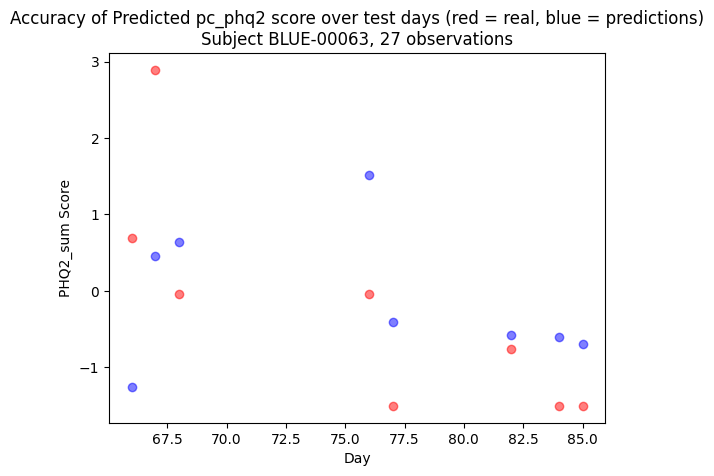

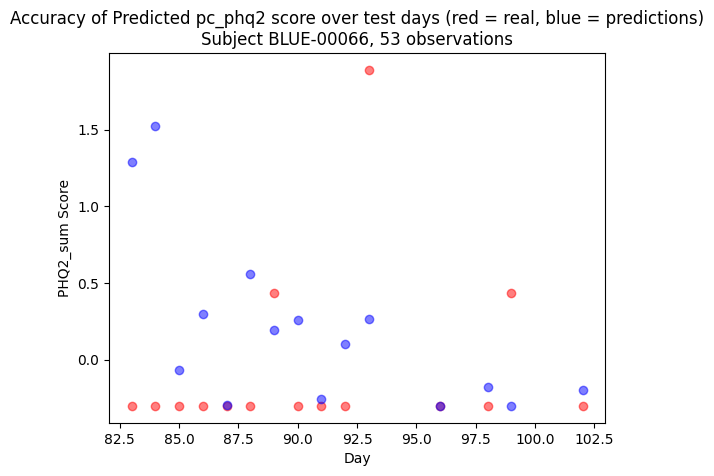

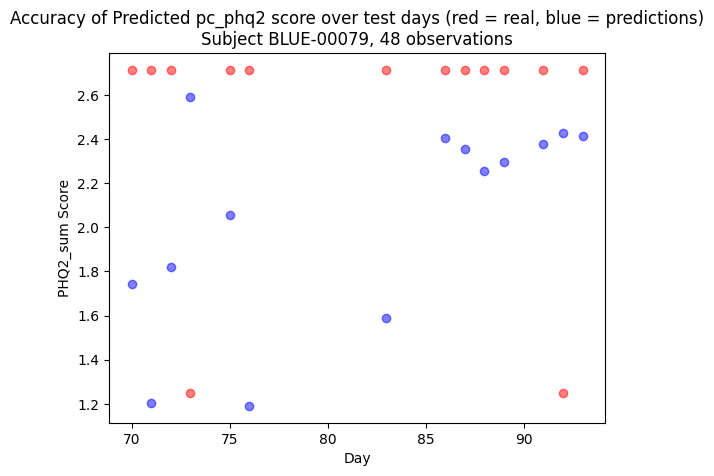

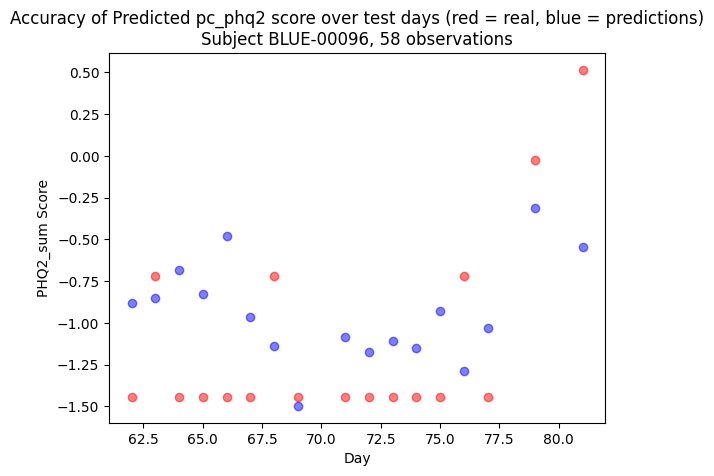

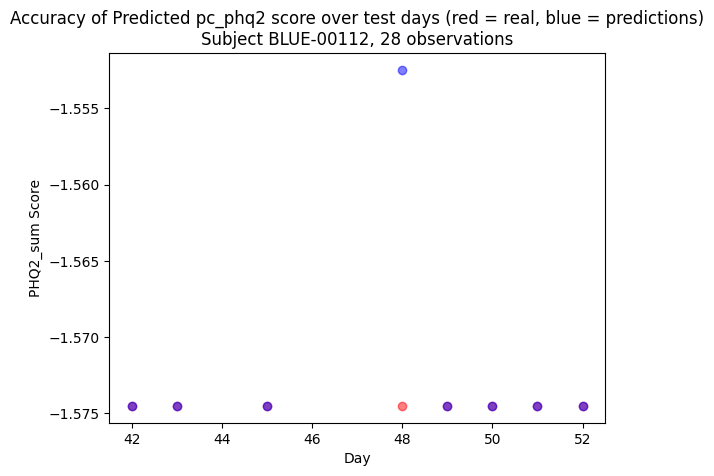

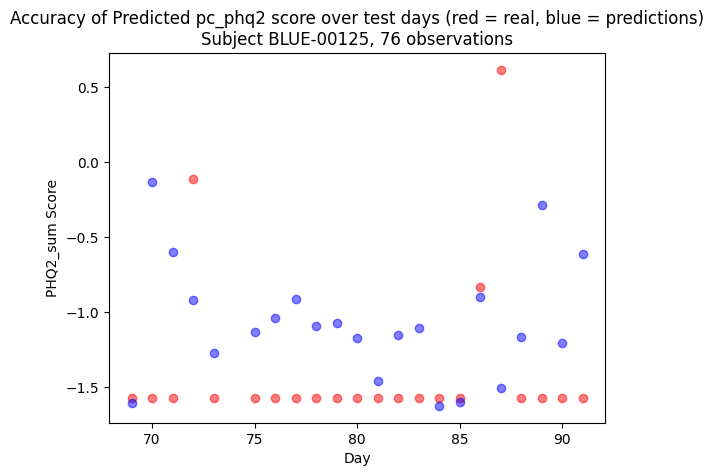

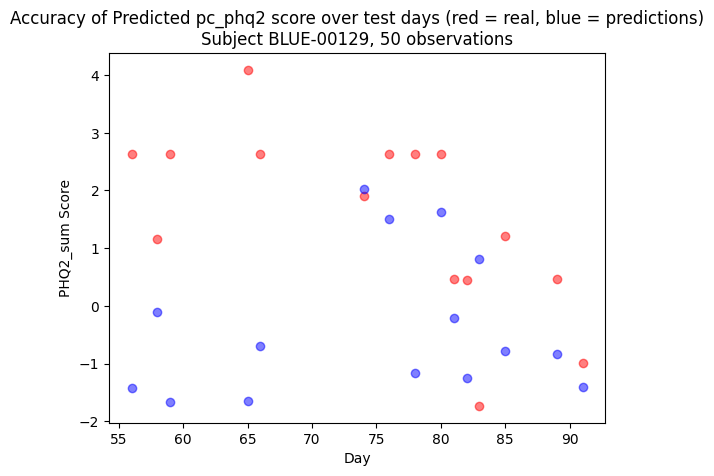

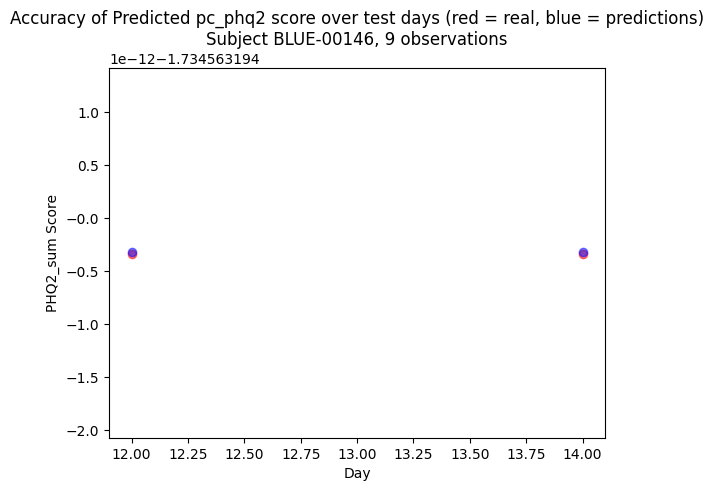

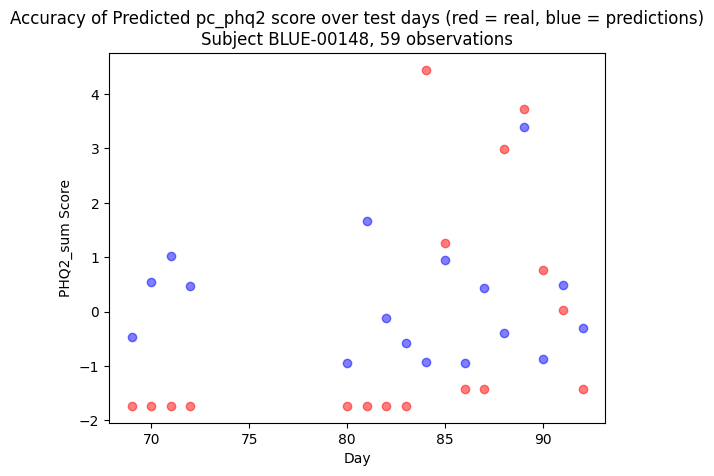

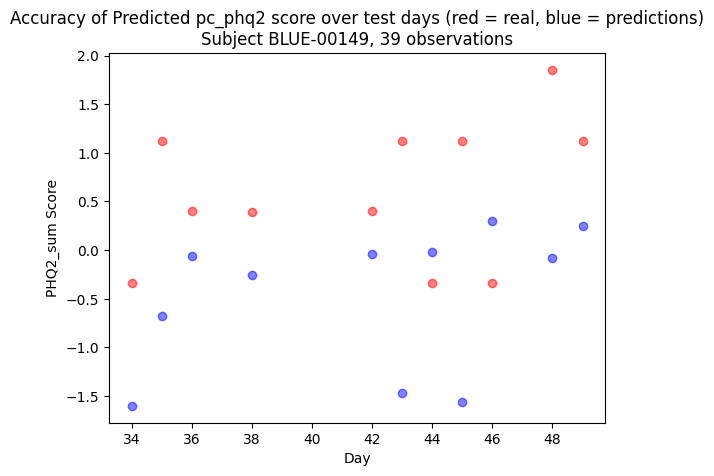

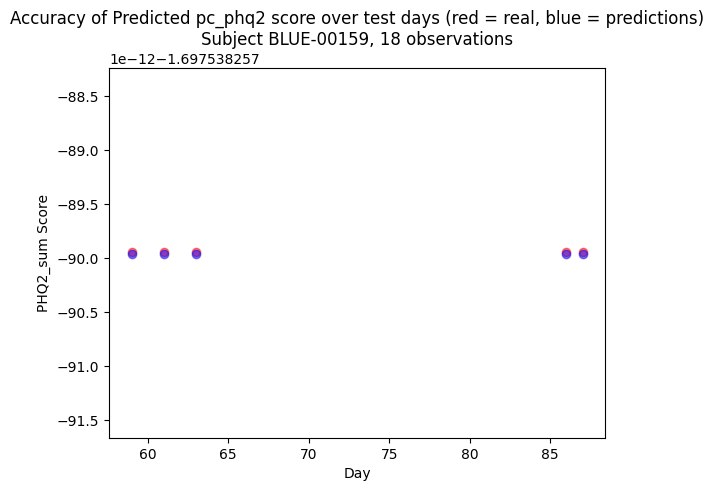

In [ ]:
####### Try RF Walk-forward validation on individual subjects
# Define y col and the data
y_var = 'pc_depression'
data = pd.read_csv(os.path.join(brighten_dir, 'v1_day_pca.csv'))
results = pd.DataFrame()
count=0
x_cols = [col for col in data.columns.to_list() if 'pc_' in col and col!=y_var]
y_col = [y_var]
num_subjects_to_test =  10


# Define what x columns will go into the model
all_cols = ['participant_id', 'day'] + x_cols + y_col
rf_v1 = data[all_cols]

# Drop any participants with NA data in those x-cols
#print('pre dropna', rf_v1.shape)
rf_v1 = rf_v1.dropna()
#print('post dropna', rf_v1.shape)

# Go through each participant
for id in rf_v1['participant_id'].unique():
    if count <= num_subjects_to_test:
        sub_df = rf_v1[rf_v1['participant_id'] == id]
        sub_df = sub_df.sort_values('day')
        
        # If particpant has 8+ entries, run the RF model on them
        if sub_df.shape[0] > 8:
            #print(sub_df)
            # Define test percentage
            test_prc = 0.3

            # Calculate number of rows used for testing vs. for training
            rows = sub_df.shape[0]
            n_test = int(rows * test_prc)

            # Extract the days of the test set, by taking all dates n_test from the end
            sub_df = sub_df.set_index('day')
            test_dates = sub_df.index[-n_test:]
            
            #print(test_dates)

            # Do RF after dropping day and participant ID 
            sub_df_clean = sub_df.drop(['participant_id'], axis=1)
            #print('columns:', sub_df_clean.columns.tolist())
            mae, test_y, rf_predictions, rmse, r2 = mod.walk_forward_validation(sub_df_clean, 0.3, verbose=False)
            
                
            # Step 3: Create DataFrame for easy merging
            sub_results = pd.DataFrame({
                'subject_id': [id],
                'r-squared': [r2],
                'mae': [mae],
                'rmse': [rmse]
            })
            results = pd.concat([results, sub_results], ignore_index=True)
            
            count+=1
            
            # Scatterplot expected and predicted for each day
            plt.scatter(test_dates,test_y, color='red',marker='o', alpha=0.5)
            plt.scatter(test_dates, rf_predictions, color='blue',marker='o', alpha=0.5)
            plt.xlabel('Day')
            plt.ylabel('PHQ2_sum Score')
            plt.title(f'Accuracy of Predicted pc_phq2 score over test days (red = real, blue = predictions)\nSubject {id}, {sub_df.shape[0]} observations')
            plt.show()


            # # lineplot expected vs predicted
            # plt.figure(figsize=(5,2))
            # plt.plot(rf_predictions, label='Predicted')
            # plt.plot(test_y, label='Expected')
            # plt.title(f'Accuracy of Predicted PHQ2_SUM score over test days\nSubject {id}, {sub_df.shape[0]} observations')
            # plt.legend()
            # plt.show()

In [ ]:
########### Running multivariate stacked walk-forward validation on all subjects ###########
# Define y col and the data
y_var = 'pc_depression'
data = pd.read_csv(os.path.join(brighten_dir, 'v1_day_pca.csv'))
x_cols = [col for col in data.columns.to_list() if 'pc_' in col and col!=y_var]
all_cols = ['participant_id', 'day'] + x_cols + [y_var]
rf_data = data[all_cols]

# Drop any participants with NA data in those x-cols
#print('pre dropna', rf_v1.shape)
rf_data = rf_data.dropna()
#print('post dropna', rf_v1.shape)

# Take out val percentage
test_prc = 0.3
# Calculate number of rows used for testing vs. for training
rows = rf_data.shape[0]
val_prc = 0.15
n_val = int(rows * val_prc)
print(n_val)
val_dates = rf_data.index[-n_val:]
val_rows = rf_data.iloc[val_dates]
print(val_rows.shape)

# Do RF after dropping day and participant ID 
rf_clean = rf_data.drop(['participant_id'], axis=1)
#print('columns:', sub_df_clean.columns.tolist())
mae, test_y, rf_predictions, rmse, r2 = walk_forward_validation(rf_clean, 0.3, verbose=False)

# Step 3: Create DataFrame for easy merging
rf_results = pd.DataFrame({
    'r-squared': [r2],
    'mae': [mae],
    'rmse': [rmse]
})

print(rf_results)

# Scatterplot expected and predicted for each day
plt.scatter(test_dates,test_y, color='red',marker='o', alpha=0.5)
plt.scatter(test_dates, rf_predictions, color='blue',marker='o', alpha=0.5)
plt.xlabel('Day')
plt.ylabel(f'{y_var} Score')
plt.title(f'Accuracy of Predicted {y_var} score over test days\n')
plt.show()



765
(765, 7)


KeyboardInterrupt: 

['aggregate_communication_scaled_int', 'call_count_scaled_int', 'call_duration_scaled_int', 'interaction_diversity_scaled_int', 'missed_interactions_scaled_int', 'mobility_scaled_int', 'mobility_radius_scaled_int', 'sms_count_scaled_int', 'sms_length_scaled_int', 'unreturned_calls_scaled_int']
Validation Results:
MAE: 0.8526027397260273, RMSE: 1.0875314512850867, R2: -0.09114731876217275


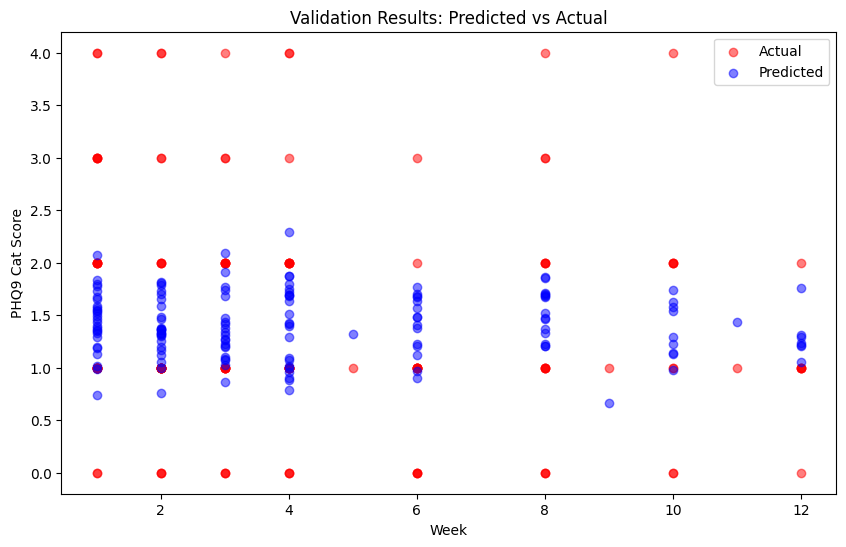

In [ ]:
# Do Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define your X (features) and y (target) for training and validation
# Remove 'participant_id' and 'day' from val_rows for predictions
# Define y col and the data
y_var = 'pc_depression'

for name, df in dfs_scaled.items():
    data = pd.read_csv(os.path.join(brighten_dir, f'{name}_pca.csv'))
    x_cols = [col for col in data.columns.to_list() if 'pc_' in col and col!=y_var]
    y_col = [y_var]
    all_cols = ['participant_id', 'day'] + x_cols + y_col

    # Take out val percentage
    val_prc = 0.15
    n_val = int(data.shape[0] * val_prc) # Number of val rows
    val_dates = data.index[-n_val:] # Define val indexes
    val_df = data.iloc[val_dates] # Drop those indexes
    val_x = val_df[x_cols]
    val_y = val_df[y_var]

    # Traintest df taking out val
    traintest_df = data.drop(val_dates)

    # Training data for the random forest
    train_x = traintest_df[x_cols]
    train_y = traintest_df[y_var]

    # Step 2: Train the Random Forest model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(train_x, train_y.values.ravel())  # Flatten y for sklearn compatibility

    # Step 3: Apply the model to validation data
    val_predictions = rf_model.predict(val_x)

    # Step 4: Evaluate the performance on validation rows
    val_mae = mean_absolute_error(val_y, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(val_y, val_predictions))
    val_r2 = r2_score(val_y, val_predictions)

    print(f"Validation Results:\nMAE: {val_mae}, RMSE: {val_rmse}, R2: {val_r2}")

    # Step 5: Create a scatterplot for validation data
    plt.figure(figsize=(10, 6))
    plt.scatter(val_df['week'], val_y, color='red', marker='o', alpha=0.5, label='Actual')
    plt.scatter(val_df['week'], val_predictions, color='blue', marker='o', alpha=0.5, label='Predicted')
    plt.xlabel('Week')
    plt.ylabel('pc_depression Score')
    plt.title(f'RF Regressor Model predicting {y_var} in {name}')
    plt.suptitle(f'Mean Absolute Error: {val_mae:.2f}; R2 Score: {val_r2:.2f}')
    plt.legend()
    plt.show()

['aggregate_communication_scaled_int', 'call_count_scaled_int', 'call_duration_scaled_int', 'interaction_diversity_scaled_int', 'missed_interactions_scaled_int', 'mobility_scaled_int', 'mobility_radius_scaled_int', 'sms_count_scaled_int', 'sms_length_scaled_int', 'unreturned_calls_scaled_int']
(977, 28)
(831, 28)
Validation Results:
MAE: 0.9178082191780822, RMSE: 1.3085598064755342, R2: -0.5797446440164467


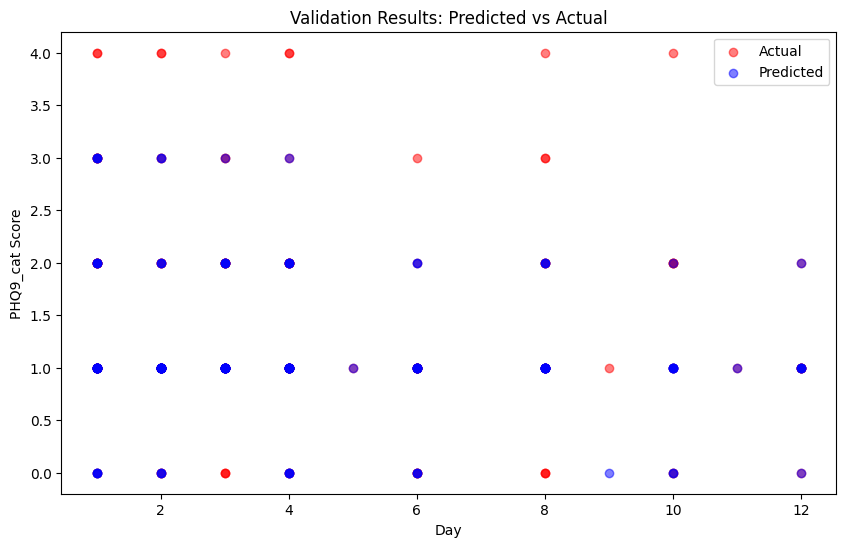

In [ ]:
######## Running classifier instead of regressor ##########
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define your X (features) and y (target) for training and validation
# Remove 'participant_id' and 'day' from val_rows for predictions
# Define y col and the data
data = pd.read_csv(os.path.join(brighten_dir, 'v1_week_pca.csv'))
y_var = ['phq9_cat']
id_vars = ['participant_id','num_id','week']
x_cols = [col for col in data.columns if 'pc_' not in col and 'phq9' not in col and col not in id_vars]
print(x_cols)

# Take out val percentage
val_prc = 0.15
n_val = int(data.shape[0] * val_prc) # Number of val rows
val_dates = data.index[-n_val:] # Define val indexes
val_df = data.iloc[val_dates] # Drop those indexes
val_x = val_df[x_cols]
val_y = val_df[y_var]

# Traintest df taking out val
traintest_df = data.drop(val_dates)

# Training data for the random forest
train_x = traintest_df[x_cols]
train_y = traintest_df[y_var]

# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_x, train_y.values.ravel())  # Flatten y for sklearn compatibility

# Step 3: Apply the model to validation data
val_predictions = rf_model.predict(val_x)

# Step 4: Evaluate the performance on validation rows
val_mae = mean_absolute_error(val_y, val_predictions)
val_rmse = np.sqrt(mean_squared_error(val_y, val_predictions))
val_r2 = r2_score(val_y, val_predictions)

print(f"Validation Results:\nMAE: {val_mae}, RMSE: {val_rmse}, R2: {val_r2}")

# Step 5: Create a scatterplot for validation data
plt.figure(figsize=(10, 6))
plt.scatter(val_df['week'], val_y, color='red', marker='o', alpha=0.5, label='Actual')
plt.scatter(val_df['week'], val_predictions, color='blue', marker='o', alpha=0.5, label='Predicted')
plt.xlabel('Day')
plt.ylabel('PHQ9_cat Score')
plt.title('Validation Results: Predicted vs Actual')
plt.legend()
plt.show()